In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm
import seaborn as sns
%matplotlib inline

from scipy import signal

In [103]:
train = pd.read_json("../data/train.json")
train["inc_angle"] = pd.to_numeric(train["inc_angle"], errors="coerce")

In [104]:
train.tail()

,band_1,band_2,id,inc_angle,is_iceberg
1599,"[-30.999878, -29.976866, -28.233906, -29.50732...","[-27.847719, -28.233864, -24.712078, -24.45282...",04e11240,NaN,0
1600,"[-25.31155, -26.511555, -28.694487, -27.180115...","[-29.563713, -28.290375, -26.839405, -28.29046...",c7d6f6f8,NaN,0
1601,"[-18.141895, -18.141844, -19.01737, -19.701599...","[-25.305355, -29.387701, -28.963863, -26.16023...",bba1a0f1,NaN,0
1602,"[-22.455633, -25.794661, -26.954567, -22.83354...","[-26.070356, -22.093737, -21.577662, -24.53376...",7f66bb44,NaN,0
1603,"[-19.909191, -20.678406, -20.208834, -18.42441...","[-24.44487, -24.956001, -27.722103, -26.078417...",9d8f326c,NaN,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1471 non-null float64
is_iceberg    1604 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 75.2+ KB


In [6]:
test = pd.read_json("../data/test.json")
test["inc_angle"] = pd.to_numeric(test["inc_angle"], errors="coerce")

In [7]:
test.head()

,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.966400
1,"[-26.0589694977, -26.0589694977, -26.058969497...","[-25.7542076111, -25.7542076111, -25.754207611...",4023181e,32.615072
2,"[-14.1410999298, -15.0642414093, -17.375520706...","[-14.745639801, -14.5904102325, -14.3626976013...",b20200e4,37.505433
3,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",e7f018bb,34.473900
4,"[-23.3745937347, -26.0271816254, -28.121963501...","[-25.7223434448, -27.0115776062, -23.149162292...",4371c8c3,43.918874


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8424 entries, 0 to 8423
Data columns (total 4 columns):
band_1       8424 non-null object
band_2       8424 non-null object
id           8424 non-null object
inc_angle    8424 non-null float64
dtypes: float64(1), object(3)
memory usage: 329.1+ KB


In [10]:
icebergs = train[train.is_iceberg==1].sample(n=9, random_state=987)
ships = train[train.is_iceberg==0].sample(n=9, random_state=456)

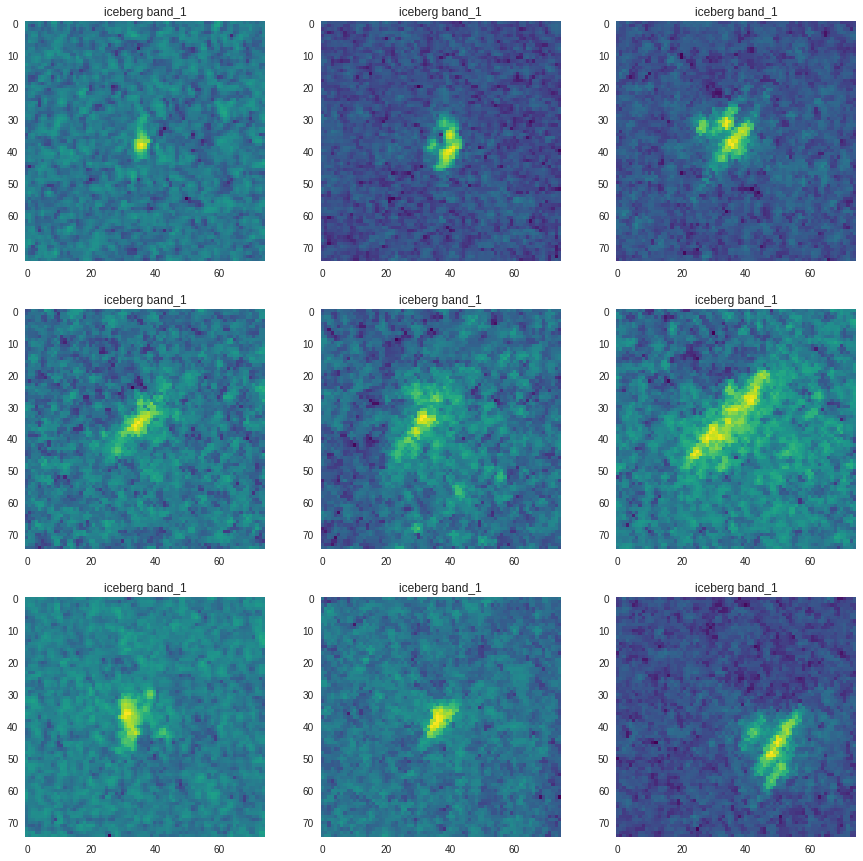

In [22]:
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,0]),(75,75))
    ax.imshow(arr, cmap="viridis")
    ax.set_title("iceberg band_1")
    ax.grid(False)

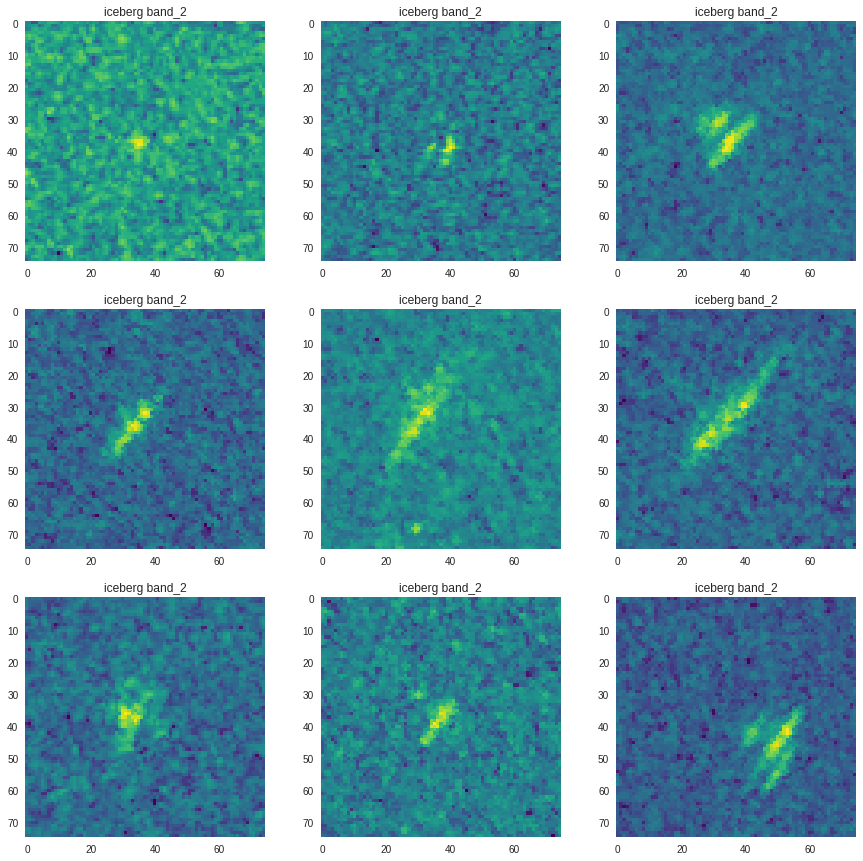

In [94]:
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,1]),(75,75))
    ax.imshow(arr, cmap="viridis")
    ax.set_title("iceberg band_2")
    ax.grid(False)

In [13]:
# figure average value of band_1 and band_2
temp1 = [np.array(x) for x in icebergs.iloc[:,0].values]
temp2 = [np.array(x) for x in icebergs.iloc[:,1].values]

for idx in range(len(temp1)):
    temp1[idx] += temp2[idx]
    temp1[idx] = temp1[idx] / 2

In [14]:
temp1[0]

array([-24.3182685, -24.9398035, -27.1608785, ..., -24.524834 ,
       -24.7367795, -24.861663 ])

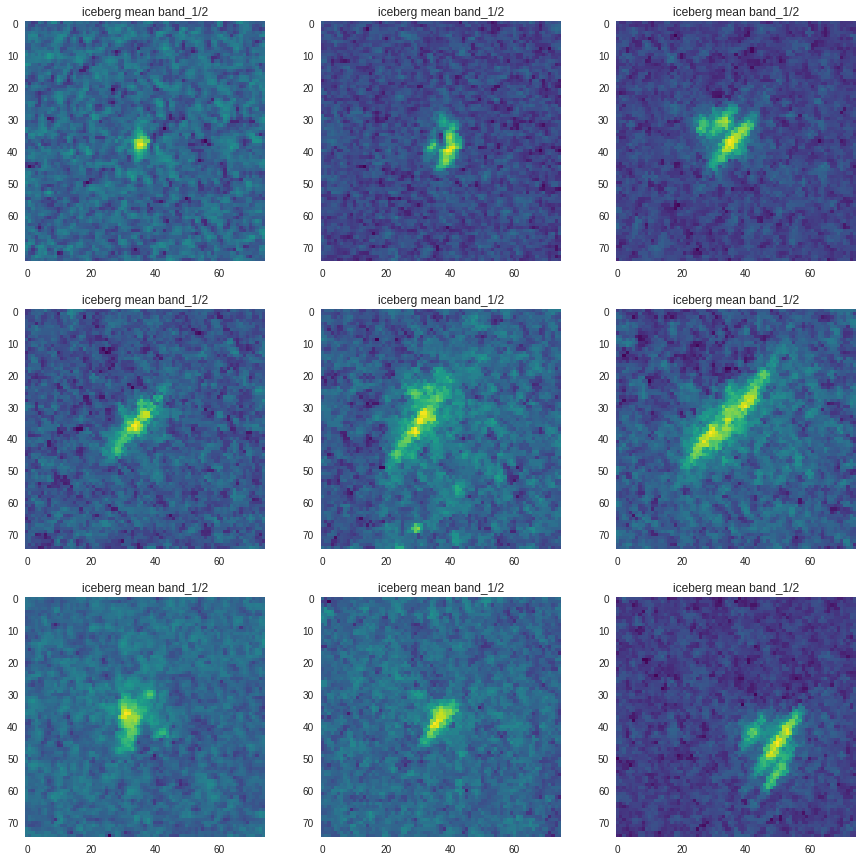

In [20]:
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(temp1[i],(75,75))
    ax.imshow(arr, cmap="viridis")
    ax.set_title("iceberg mean band_1/2")
    ax.grid(False)

In [16]:
# figure sin/cos component value of band_1 and band_2
tem1 = [np.array(x) for x in icebergs.iloc[:,0].values]
tem2 = [np.array(x) for x in icebergs.iloc[:,1].values]

# incidence angle
tem3 = np.array(icebergs.iloc[:,3].values)


# print(np.sqrt(np.sin(tem3 * (np.pi / 180))**2 + np.cos(tem3 * (np.pi / 180))**2))
# print()
temp_result = []
for idx in range(len(tem1)):
    _sin = np.sin(tem3[idx] * np.pi / 180)
    _cos = np.cos(tem3[idx] * (np.pi / 180))
#     print("angle: {:0.2f}   sin: {:0.2f}  cos: {:0.2f}".format(tem3[idx], _sin, _cos))
    
#     print((tem2[idx] * _sin) + (tem1[idx] * _cos))
    
    temp_result.append((tem1[idx] * _sin) + (tem2[idx] * _cos))

In [17]:
temp_result[0]

array([-34.85305676, -35.63298156, -39.01394107, ..., -34.70541096,
       -35.21093813, -35.53562268])

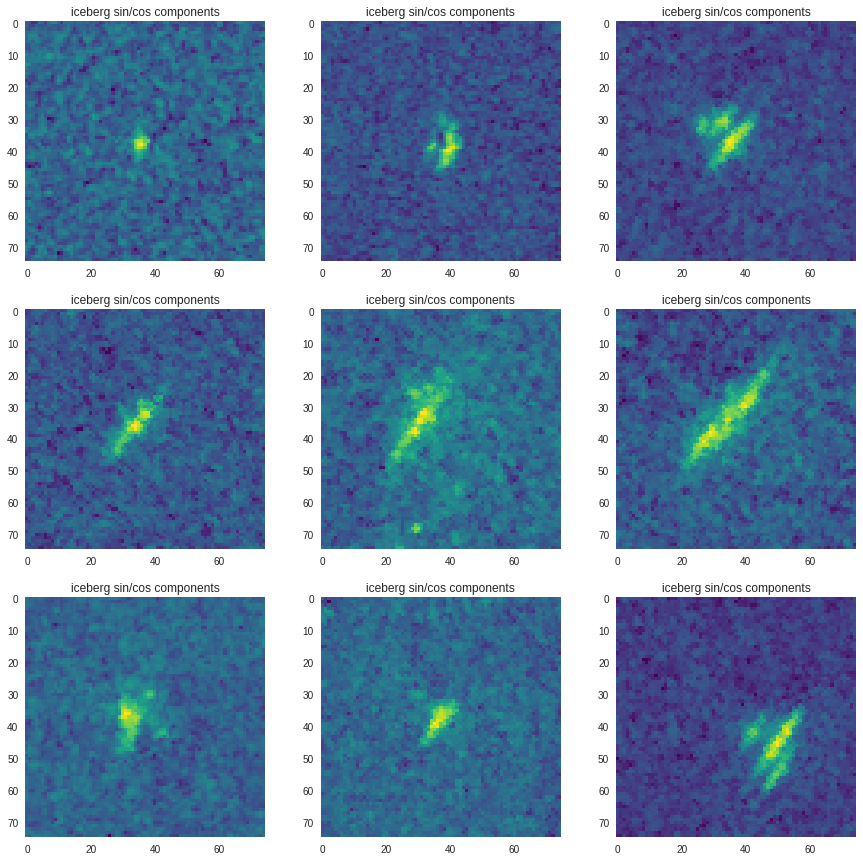

In [19]:
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(temp_result[i],(75,75))
    ax.imshow(arr, cmap="viridis")
    ax.set_title("iceberg sin/cos components")
    ax.grid(False)

In [25]:
def get_worms(data):
    xderivative = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    yderivative = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    arrx = signal.convolve2d(np.reshape(data,(75,75)), xderivative, mode="valid")
    arry = signal.convolve2d(np.reshape(data, (75,75)), yderivative, mode="valid")
    worms = np.hypot(arrx, arry)
    
    return worms

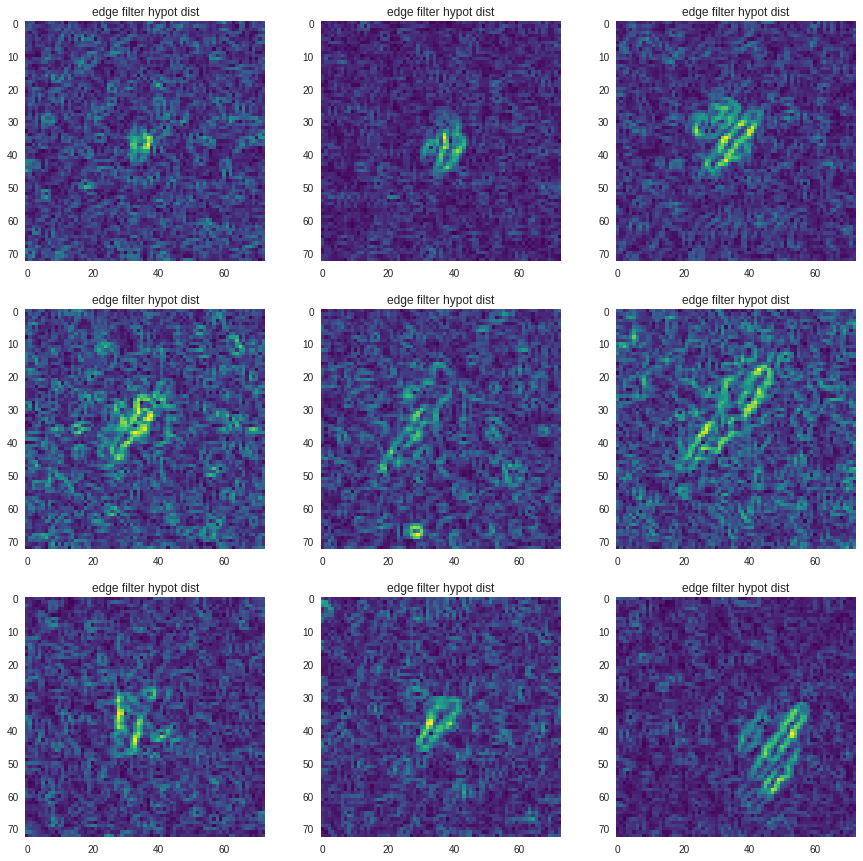

In [27]:
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    worms = get_worms(temp_result[i])
    ax.imshow(worms, cmap="viridis")
    ax.set_title("edge filter hypot dist")
    ax.grid(False)

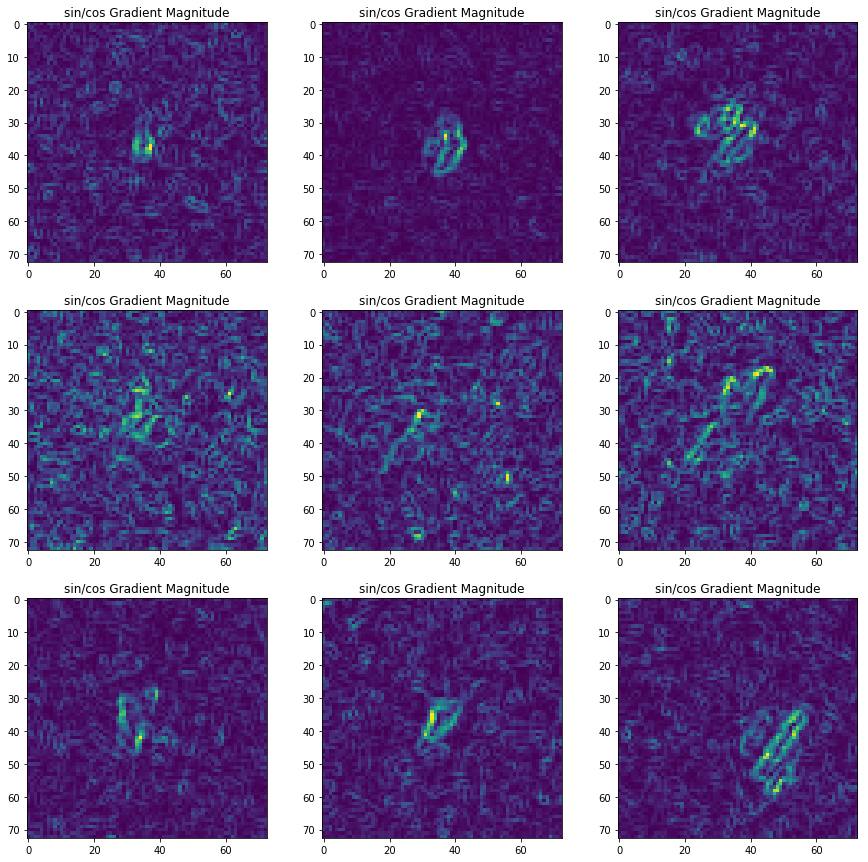

In [179]:
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arrx = signal.convolve2d(np.reshape(np.array(icebergs.iloc[i,0]), (75,75)), xderivative, mode="valid")
    arry = signal.convolve2d(np.reshape(np.array(icebergs.iloc[i,0]), (75,75)), yderivative, mode="valid")
    ax.imshow(np.hypot(arrx, arry), cmap="viridis", norm=PowerNorm(gamma=1.5))
    ax.set_title("sin/cos Gradient Magnitude")

In [28]:
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])

In [29]:
X_band_1.shape

(1604, 75, 75)

In [30]:
X_band_1.min()

-45.594448

In [31]:
X_band_1.max()

34.574917

In [32]:
X_band_1.mean()

-20.655821

In [52]:
boink = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]])

In [53]:
boink

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [54]:
biz = np.array([boink + x/100.0 for x in range(10)])

In [55]:
print biz

[[[  1.     2.     3.     4.     5.  ]
  [  6.     7.     8.     9.    10.  ]
  [ 11.    12.    13.    14.    15.  ]
  [ 16.    17.    18.    19.    20.  ]
  [ 21.    22.    23.    24.    25.  ]]

 [[  1.01   2.01   3.01   4.01   5.01]
  [  6.01   7.01   8.01   9.01  10.01]
  [ 11.01  12.01  13.01  14.01  15.01]
  [ 16.01  17.01  18.01  19.01  20.01]
  [ 21.01  22.01  23.01  24.01  25.01]]

 [[  1.02   2.02   3.02   4.02   5.02]
  [  6.02   7.02   8.02   9.02  10.02]
  [ 11.02  12.02  13.02  14.02  15.02]
  [ 16.02  17.02  18.02  19.02  20.02]
  [ 21.02  22.02  23.02  24.02  25.02]]

 [[  1.03   2.03   3.03   4.03   5.03]
  [  6.03   7.03   8.03   9.03  10.03]
  [ 11.03  12.03  13.03  14.03  15.03]
  [ 16.03  17.03  18.03  19.03  20.03]
  [ 21.03  22.03  23.03  24.03  25.03]]

 [[  1.04   2.04   3.04   4.04   5.04]
  [  6.04   7.04   8.04   9.04  10.04]
  [ 11.04  12.04  13.04  14.04  15.04]
  [ 16.04  17.04  18.04  19.04  20.04]
  [ 21.04  22.04  23.04  24.04  25.04]]

 [[  1.05   2.0

In [70]:
print biz.shape

(10, 5, 5)


In [89]:
recoil= np.concatenate((biz, biz[:,:,::-1]), axis=0)

In [90]:
recoil.shape

(20, 5, 5)

In [149]:
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])

X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])

# make a channel that is the average of the two channels
X_avg_band = (X_band_1+X_band_2)/2.0

# TODO: need to normalize data at some point

data = np.concatenate([X_band_1[..., np.newaxis], X_band_2[..., np.newaxis], X_avg_band[..., np.newaxis]], axis=-1)


In [150]:
data.shape

(1604, 75, 75, 3)

In [151]:
process_data = [data[...,channel]  for channel in range(data.shape[3])]

new_data = []
for channel in process_data:
    new_channel = np.concatenate((channel, channel[...,::-1]), axis=0)
    new_data.append(new_channel[..., np.newaxis])
    print channel.shape
    

# new_data = np.array(new_data)
boink = np.array(process_data)
print boink.shape

# double_data = np.concatenate([new_data[0][..., np.newaxis], new_data[1][..., np.newaxis], new_data[2][...,np.newaxis]], axis=-1)
double_data = np.concatenate(new_data, axis=-1)

(1604, 75, 75)
(1604, 75, 75)
(1604, 75, 75)
(3, 1604, 75, 75)


In [152]:
double_data.shape

(3208, 75, 75, 3)

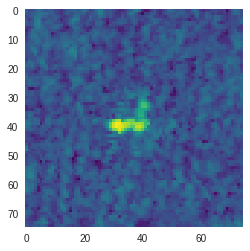

In [157]:
fig, azzz = plt.subplots()

azzz.imshow(double_data[1, :, :, 0], cmap="viridis")
azzz.grid(False)

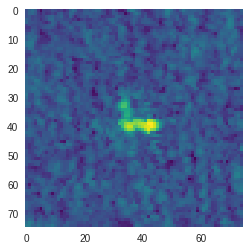

In [158]:
fig, azzz = plt.subplots()

azzz.imshow(double_data[1605, :, :, 0], cmap="viridis")
azzz.grid(False)

In [159]:
y_train = train.loc[:,'is_iceberg']

In [160]:
y_train.shape

(1604,)

In [161]:
double_y_train = np.concatenate((y_train, y_train), axis=0)

In [162]:
double_y_train.shape

(3208,)

In [229]:
test=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])

print "original"
print "max:", test.max()
print "min:", test.min()

print "mean:", test.mean()

avg_test = test - test.mean()
print "averaged"
print "max", avg_test.max()
print "min", avg_test.min()

std_test = avg_test / (test.std()**2)

boink = np.linalg.n

print "standardized:"
print "max", std_test.max()
print "min", std_test.min()
print "mean", std_test.mean()

boink = np.zeros((75,75))

temp_squid = test**2
squid = temp_squid - temp_squid.mean()
squid = squid / (test.std()**2)
print "squid"
print "max", squid.max()
print "min", squid.min()
print "mean", squid.mean()

original
max: 34.5749
min: -45.5944
mean: -20.6558
averaged
max 55.2307
min -24.9386
standardized:
max 2.0419
min -0.921988
mean -3.73464e-07
squid
max 60.082
min -16.7739
mean -4.46028e-06


In [ ]:
boink = np.linalg.norm

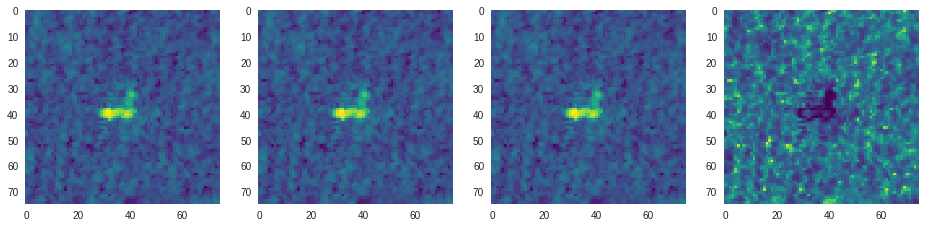

In [228]:
fig, azzz = plt.subplots(1,4, figsize=(16,16))

azzz[0].imshow(test[1, ...], cmap="viridis")
azzz[0].grid(False)

azzz[1].imshow(avg_test[1, ...], cmap="viridis")
azzz[1].grid(False)

azzz[2].imshow(std_test[1, ...], cmap="viridis")
azzz[2].grid(False)

azzz[3].imshow(squid[1,...], cmap="viridis")
azzz[3].grid(False)

In [230]:
255 * 255 * 255

16581375

In [30]:
def standardize(feature):
    '''
    subtract the mean of feature from feature then divide by variance
    '''
    temp = feature.copy()
    return (feature - temp.mean()) / (temp.std()**2 * 1.0)

def data_pipeline(raw_data): 
    #Generate the training data
    #Create 3 bands having HH, HV and avg of both
    X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in raw_data["band_1"]])
    X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in raw_data["band_2"]])

    # make a channel that is the average of the two channels
    X_avg_band = (X_band_1+X_band_2)/2.0

    # Done: need to normalize data at some point
    X_band_1 = standardize(X_band_1)
    X_band_2 = standardize(X_band_2)
    X_avg_band = standardize(X_avg_band)

    data = np.concatenate([X_band_1[..., np.newaxis], X_band_2[..., np.newaxis], X_avg_band[..., np.newaxis]], axis=-1)

    print data.shape
    # get angle and "has angle"
    inc_angle = pd.to_numeric(raw_data["inc_angle"], errors="coerce").values.reshape(1, -1)
    print inc_angle.shape

    data = np.concatenate([data, inc_angle], axis=-1)
    
    print data.shape

In [31]:
boink = data_pipeline(train)


(1604, 75, 75, 3)
(1, 1604)


ValueError: all the input arrays must have same number of dimensions

In [105]:
all_Y_train = train.loc[:,'is_iceberg']
inc_angle = train.loc[:,"inc_angle"].copy()

single_stacks= np.column_stack([all_Y_train, inc_angle])

print all_Y_train.shape, inc_angle.shape, single_stacks.shape

(1604,) (1604,) (1604, 2)


In [106]:
print inc_angle

0       43.9239
1       38.1562
2       45.2859
3       43.8306
4       35.6256
5       36.9034
6       34.4751
7       41.1769
8       35.7829
9       43.3007
10      44.6240
11      39.5067
12      41.8544
13      45.2909
14      34.7715
15      43.7820
16      45.3568
17      38.7812
18      42.5145
19      37.2802
20      41.7973
21      38.0669
22      39.6636
23      37.6866
24      40.2960
25      39.2340
26      40.3904
27      43.7895
28      42.5891
29      41.0303
         ...   
1574        NaN
1575        NaN
1576        NaN
1577        NaN
1578        NaN
1579        NaN
1580        NaN
1581        NaN
1582        NaN
1583        NaN
1584        NaN
1585        NaN
1586        NaN
1587        NaN
1588        NaN
1589        NaN
1590        NaN
1591        NaN
1592        NaN
1593        NaN
1594        NaN
1595        NaN
1596        NaN
1597        NaN
1598        NaN
1599        NaN
1600        NaN
1601        NaN
1602        NaN
1603        NaN
Name: inc_angle, Length:

In [107]:
print inc_angle.mean()
print np.nanmean(inc_angle)
print inc_angle.sum()

39.2687074779
39.2687074779
57764.2687


In [108]:
inc_angle[np.isnan(inc_angle)] = inc_angle.mean()

In [109]:
print inc_angle.min()
print inc_angle.mean()
print inc_angle.sum()

24.7546
39.2687074779
62987.0067946
